# Task_1 Iris Data Classification
Name Of Intern: Pradeep More



# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Importing Dataset

In [2]:
df = pd.read_csv("F:/Oasis Infobyte/Iris/Iris.csv", error_bad_lines = False)

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Data Preprocessing and EDA

In [5]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Drop the 'Id' column as it is not required for analysis
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
#Label encoding to convert class labels into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [13]:
df['Species'].unique()

array([0, 1, 2])

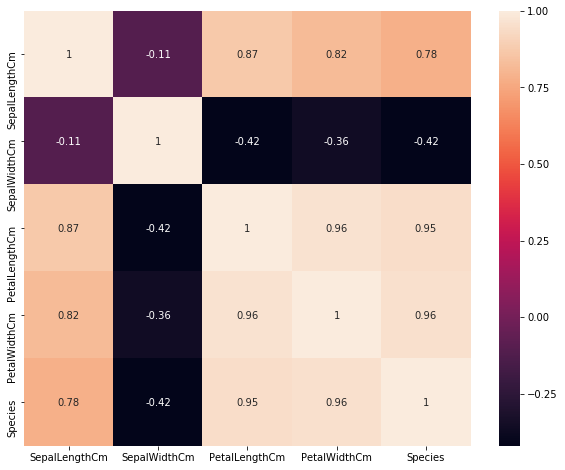

In [14]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot = True)

We can see that-
1) Species is highly in positive correlation with PetalWidthCm, PetalLengthCm and SepalLenghthCm and in negative correlation with SepalWidthCm
2) PetalLengthCm and PetalWidthCm are highly positively correlated and 
3) SepalLengthCm is also positively correlated with PetalWidthCm and PetalLengthCm

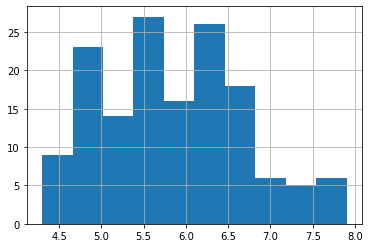

In [15]:
# Plot histograms of each feature
df['SepalLengthCm'].hist()

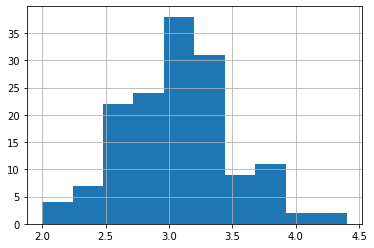

In [16]:
df['SepalWidthCm'].hist()

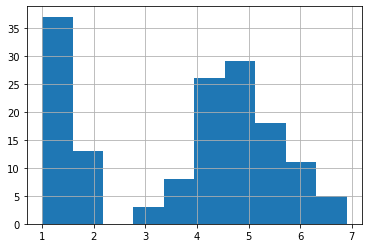

In [17]:
df['PetalLengthCm'].hist()

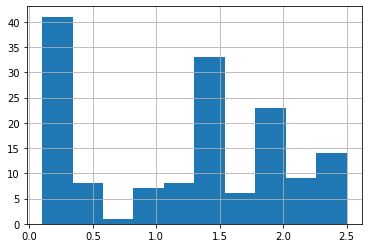

In [18]:
df['PetalWidthCm'].hist()

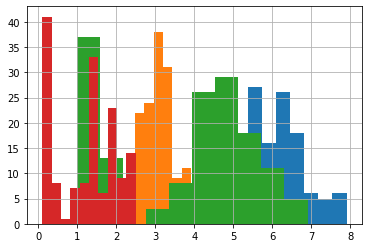

In [19]:
#Plotting the histogram of all features toghether
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

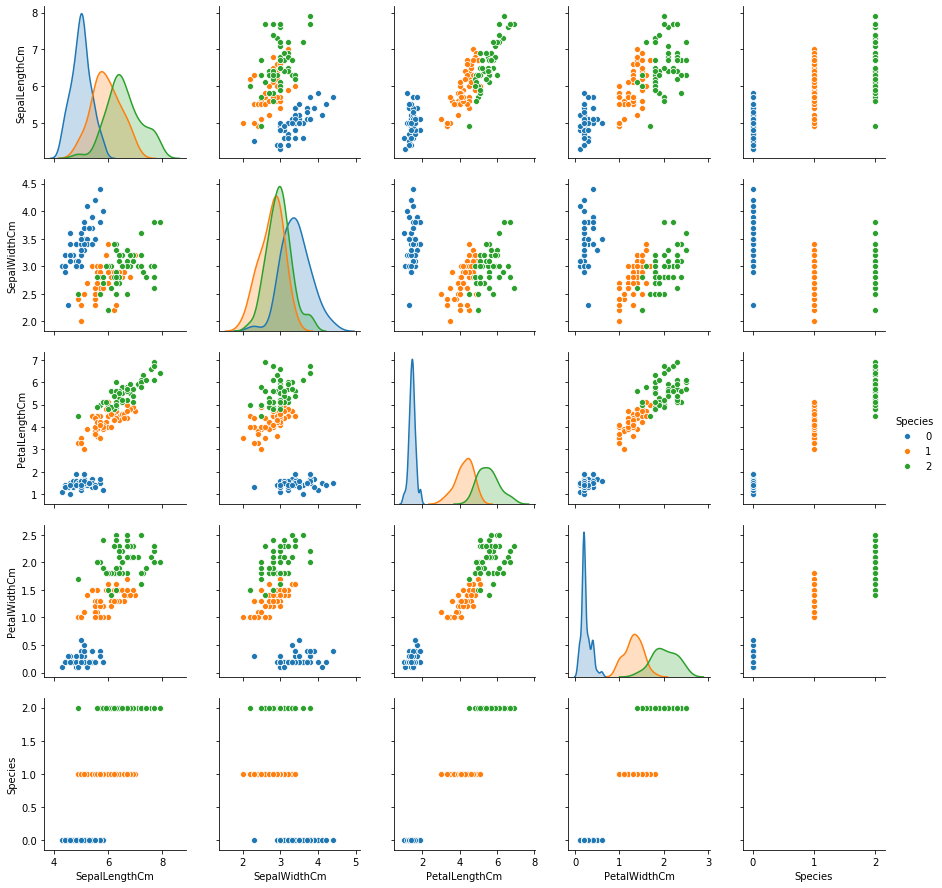

In [20]:
sns.pairplot(df,hue='Species')

# 4. Model Building

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [22]:
# Splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [23]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

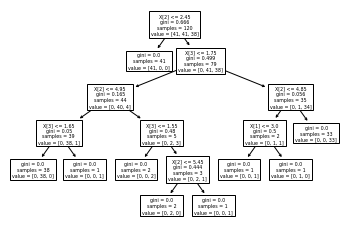

Accuracy: 1.0


In [26]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
plot_tree(model1)
plt.show()
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [30]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [28]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [29]:
# define model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


We are getting same Accuracy for all models as 1